In [60]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [61]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [63]:
#mean values at empty field
df['Age'] =df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [64]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

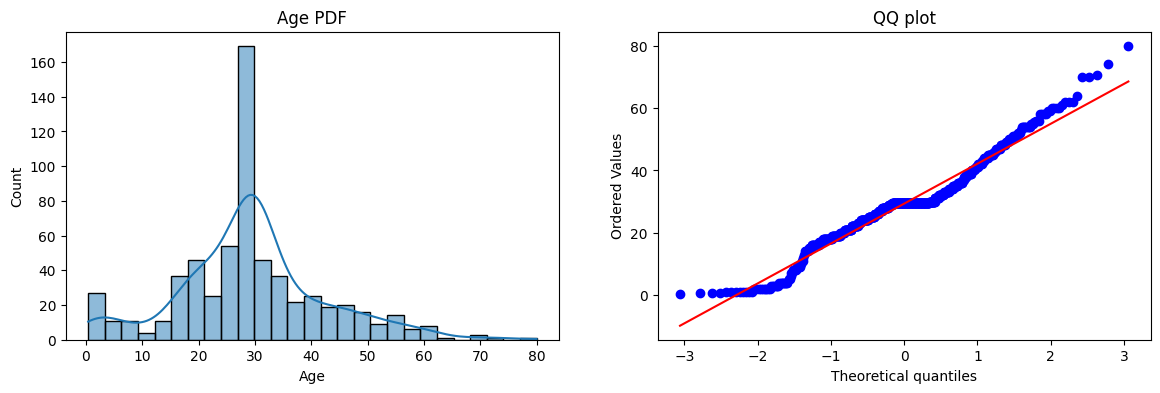

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("QQ plot")

plt.show()

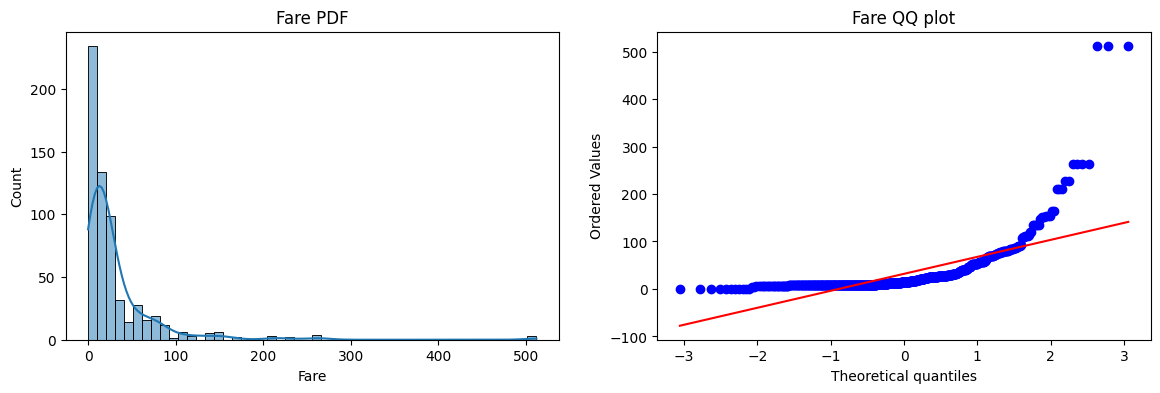

In [67]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [68]:
lreg = LogisticRegression()
dreg = DecisionTreeClassifier()

lreg.fit(X_train,y_train)
dreg.fit(X_train,y_train)

y_pred_l = lreg.predict(X_test)
y_pred_d = dreg.predict(X_test)

In [69]:
print("LogisticRegression : ")
print(accuracy_score(y_pred_l,y_test)*100)
print("DecisionTreeRegression : ")
print(accuracy_score(y_pred_d,y_test)*100)

LogisticRegression : 
65.29850746268657
DecisionTreeRegression : 
67.91044776119402


In [70]:
#log transform
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [71]:
lreg = LogisticRegression()
dreg = DecisionTreeClassifier()

lreg.fit(X_train_transformed,y_train)
dreg.fit(X_train_transformed,y_train)

y_pred_l = lreg.predict(X_test_transformed)
y_pred_d = dreg.predict(X_test_transformed)

In [72]:
print("LogisticRegression : ")
print(accuracy_score(y_pred_l,y_test)*100)
print("DecisionTreeRegression : ")
print(accuracy_score(y_pred_d,y_test)*100)

LogisticRegression : 
67.91044776119402
DecisionTreeRegression : 
67.16417910447761


In [79]:
X_transformed = trf.fit_transform(X)

lreg = LogisticRegression()
dreg = DecisionTreeClassifier()

print("LR : ",np.mean(cross_val_score(lreg,X_transformed,y,scoring='accuracy',cv=10)))
print("DT : ",np.mean(cross_val_score(dreg,X_transformed,y,scoring='accuracy',cv=10)))

LR :  0.678027465667915
DT :  0.6510112359550562


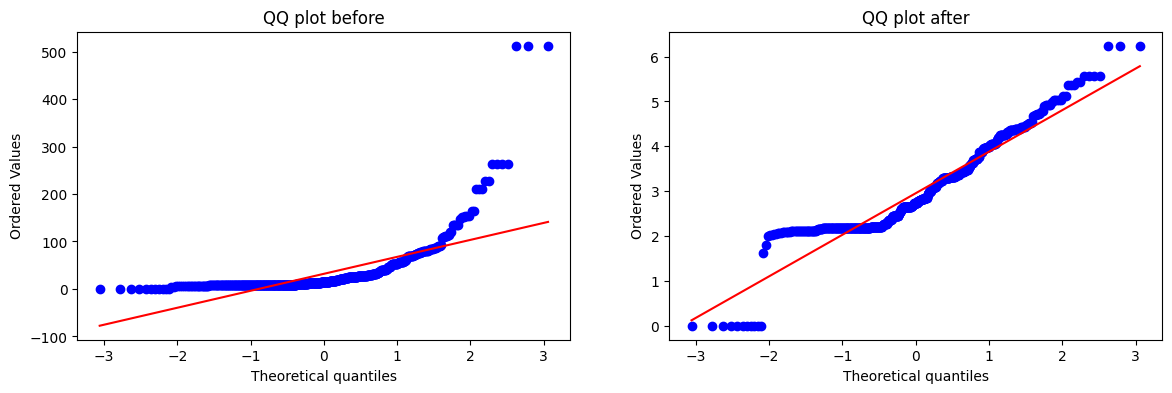

In [82]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title("QQ plot before")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title("QQ plot after")

plt.show()

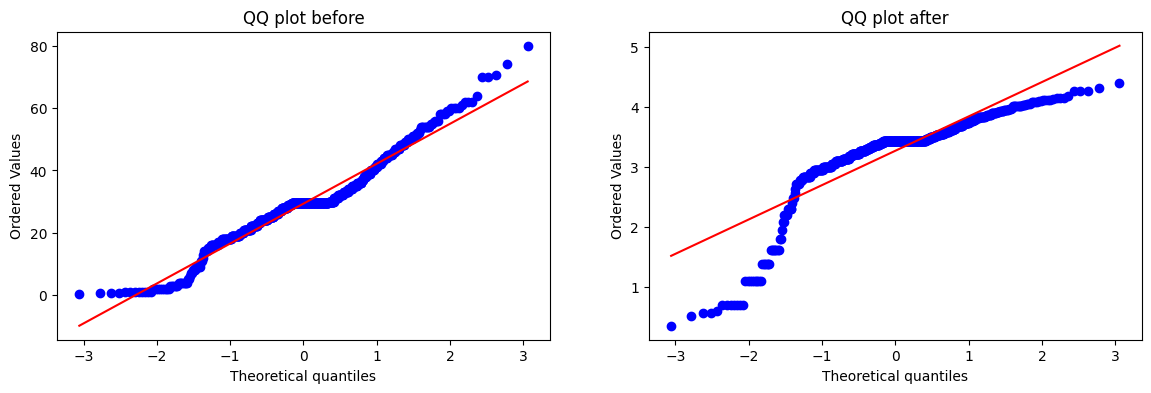

In [83]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("QQ plot before")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title("QQ plot after")

plt.show()